# **Week 2. Supervised Learning**

2주차 과제는 지도학습의 회귀, 분류 모델을 학습-평가하는 과정을 간소하게 재현한 코드입니다.

1. 적힌 코드를 따라가며, 배운 내용과 어떻게 연관되는지 등을 생각하거나 찾아본 후, 주석으로 달아주시면 좋을 것 같습니다.
2. 더불어 생각해볼 만한 질문들을 중간에 달아두었으니, 이에 대한 고민과 답변을 작성해주시면 됩니다.

# **1. 회귀 - with diabetes dataset**

In [3]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 탐색

In [4]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

In [12]:
# 데이터 크기와 피처(특성) 정보 출력
print(f"Dataset Shape: {X.shape}")  # ( , )
print(f"Feature Names: {diabetes.feature_names}")
print(f"Target (y) Sample: {y[:5]}")  # 타겟 값 일부 확인

Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target (y) Sample: [151.  75. 141. 206. 135.]


In [13]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [15]:
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [16]:
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

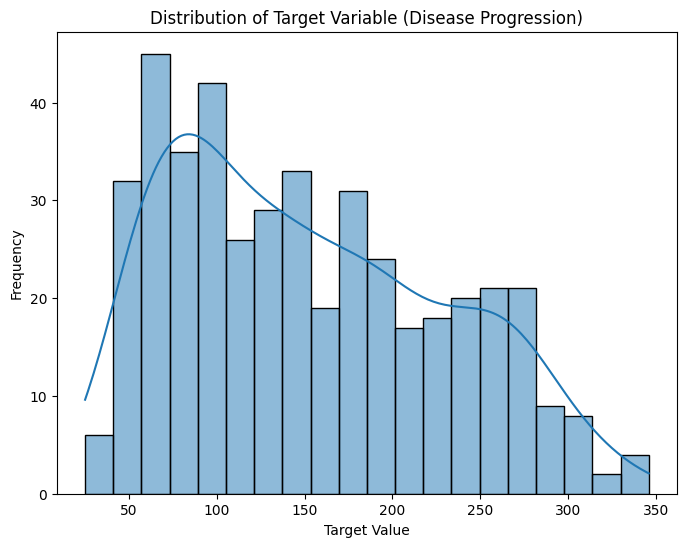

In [17]:
# 히스토그램으로 타겟 값 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=20, kde=True)
plt.title("Distribution of Target Variable (Disease Progression)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

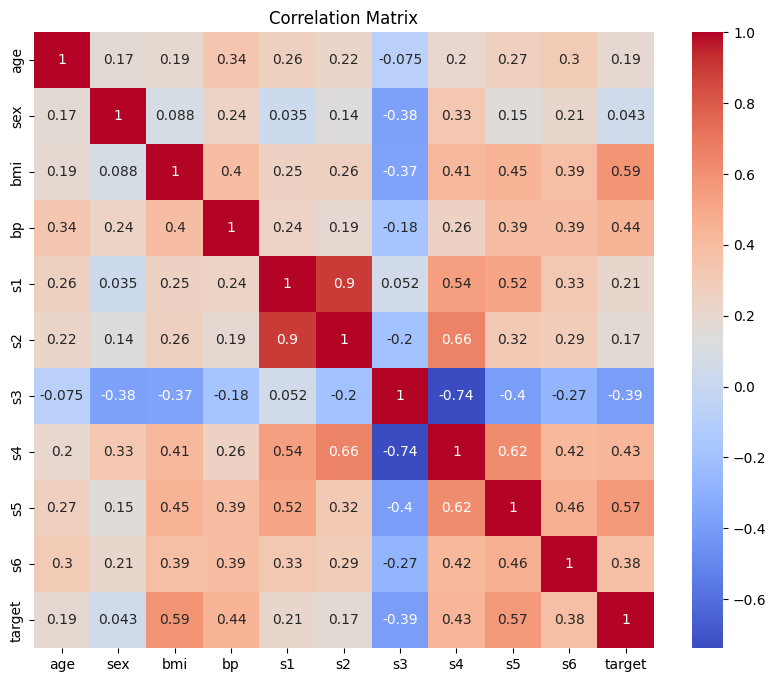

In [ ]:
# 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Q1-1: 어떤 피처(특성)가 가장 중요한지, 직접 데이터를 분석해보세요.
'''상관관계 행렬만 보고선, 어떤 변수가 가장 중요한지 알 수는 없다. 그러나 위의 결과를 보고 판단할 수 있는 것은, 우선 s1과 s2 / s3와 s4 간의 상관관계가 높기 때문에
다중공선성이 의심되고 변수 선택과정이 필요해 보인다. '''

# Q1-2: 어떤 피처가 'target'과 가장 높은 상관관계를 가지나요?
'''s5와 target이 가장 높은 상관성을 보인다.'''

## 2. 데이터 전처리: 데이터 분할 및 스케일링


In [22]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Q2: 데이터 분할 비율을 70:30 또는 90:10으로 변경하면 결과는 어떻게 달라질까요?
''' 7:3의 경우 학습 데이터가 줄어들고 검증 데이터가 늘어나기 때문에 과소적합의 위험이 증가하지만, 보다 정확한 검증 성능평가가 가능하다.
9:1의 경우 학습 데이터가 증가하기 때문에 과적합의 위험이 줄어들지만, 성능 테스트에서 정확한 검증이 어려울 수 있다.'''

In [23]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [ ]:
# Q3: 스케일링을 하지 않고 학습하면 어떤 결과가 나올까요? 한 번 실험해 보세요.

'''계수가 매우 크게 나온다.'''

## 3. 모델 적합 (선형 회귀)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)  # 학습 진행

# 모델의 가중치 출력
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Model Intercept: 151.34560453985995


In [25]:
model = LinearRegression()
model.fit(X_train1, y_train)  # 학습 진행

# 모델의 가중치 출력
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Model Intercept: 153.73654390934846


In [ ]:
# Q4: 모델의 계수를 분석해보세요. 어떤 피처가 타겟에 가장 큰 영향을 미치는지 확인하세요.

'''s1 과 s2가 회귀계수의 절댓값이 가장 크므로 영향을 크게 끼친다고 생각할 수 있다.'''

In [26]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [27]:
# 모델 평가

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 5106.62
R² Score: 0.04


In [19]:
# (선택) Q5: MSE가 높거나 R² 점수가 낮다면, 데이터를 더 분석하거나 다른 모델을 시도해보세요.
# (선택) Q6: 선형 회귀 외에 Decision Tree, Random Forest를 사용해 결과를 비교해보세요.

# 2. **분류 - with Iris dataset**

In [28]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. 데이터 로드 및 탐색

In [29]:
iris = load_iris()
X, y = iris.data, iris.target

feature_names = iris.feature_names
class_names = iris.target_names

In [30]:
# 데이터 크기와 피처 정보 출력
print(f"Dataset Shape: {X.shape}")  # (샘플 수, 피쳐 수) 
print(f"Feature Names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")  # 클래스가 몇 개이고, 어떤 게 있는지 확인해 보세요
print(f"First 5 Samples:\n{X[:5]}")

Dataset Shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
First 5 Samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [31]:
# Q1: 각 클래스에 몇 개의 데이터가 있는지 확인해 보세요. 클래스 별 데이터가 균등하게 분포되어 있나요?
unique, counts = np.unique(y, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Class Distribution: {class_distribution}")

Class Distribution: {0: 50, 1: 50, 2: 50}


In [32]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [34]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

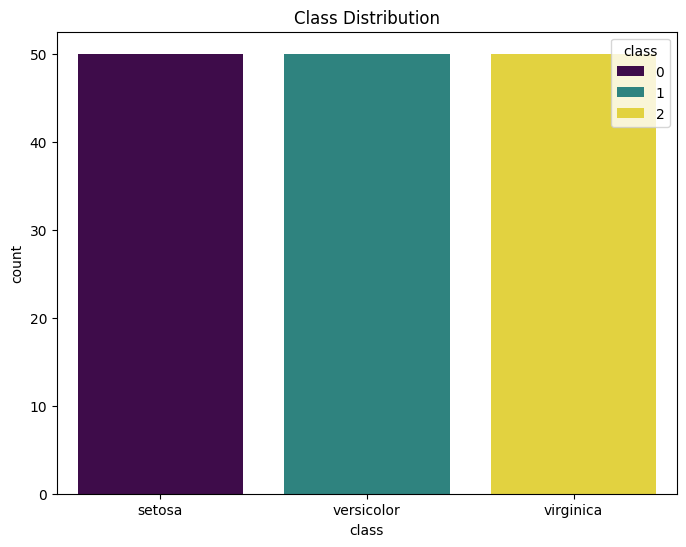

In [35]:
# 클래스별 데이터 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis', hue='class')
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=class_names)
plt.show()

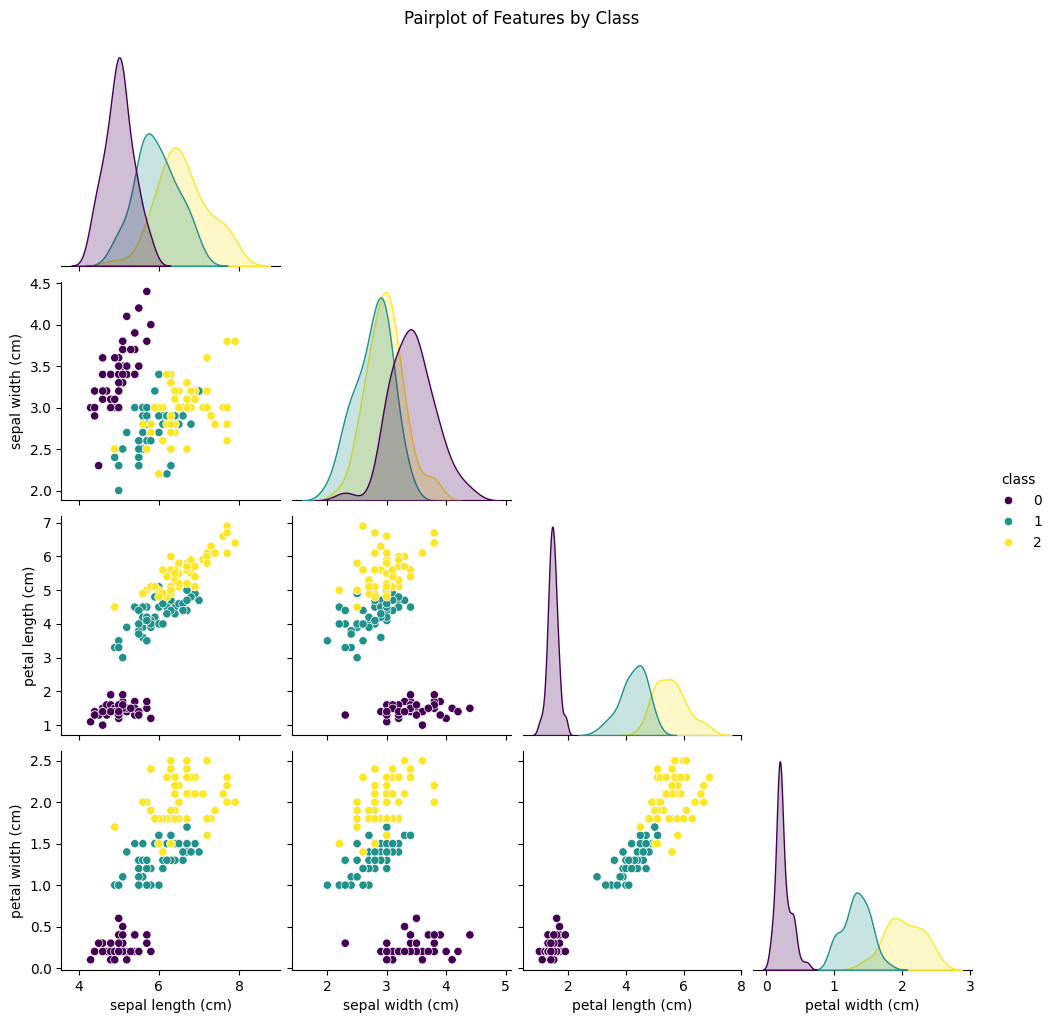

In [36]:
# 피처 간 산점도 행렬
sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

## 2. 데이터 전처리: 데이터 분할 및 스케일링

In [37]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# 훈련 데이터와 테스트 데이터 분할
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Q2: stratify를 제외하면 클래스 비율이 어떻게 달라질까요? 확인해 보세요.
def print_ratio(name, y_train, y_test):
    df = pd.DataFrame({
        'train': pd.Series(y_train).value_counts(normalize=True).sort_index(),
        'test' : pd.Series(y_test ).value_counts(normalize=True).sort_index()
    })
    print(f"\n=== {name} ===")
    print(df * 100)

# 4) 결과 출력
print_ratio('With Stratify',   y_train,   y_test)
print_ratio('Without Stratify', y_train1, y_test1)

# 클래스 비율을 균등하게 분포시켜주지 않는다.


=== With Stratify ===
       train       test
0  33.333333  33.333333
1  33.333333  33.333333
2  33.333333  33.333333

=== Without Stratify ===
       train       test
0  33.333333  33.333333
1  34.166667  30.000000
2  32.500000  36.666667


In [41]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Q3: 스케일링을 하지 않고 학습하면 정확도에 어떤 영향을 미칠까요?
# 단위가 큰 변수일수록 MSE 손실함수 값에 큰 영향을 끼쳐서 중요한 변수로 평가받고, 이를 조정하는 방식으로만 잘못 학습될 수 있다.

## 3. 모델 적합 (SVM)

In [42]:
model = SVC(kernel='linear', C=0.1)  # 선형 커널 사용
model.fit(X_train, y_train)  # 모델 학습

SVC(C=0.1, kernel='linear')

In [ ]:
# Q4: C 값을 조정해보세요 (예: 0.1, 10). 모델의 성능에 어떤 영향을 미칠까요?
# 값이 커질수록 오류를 엄격하게 잡으므로, 과대적합이 될 수 있다.

In [43]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation 

In [44]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



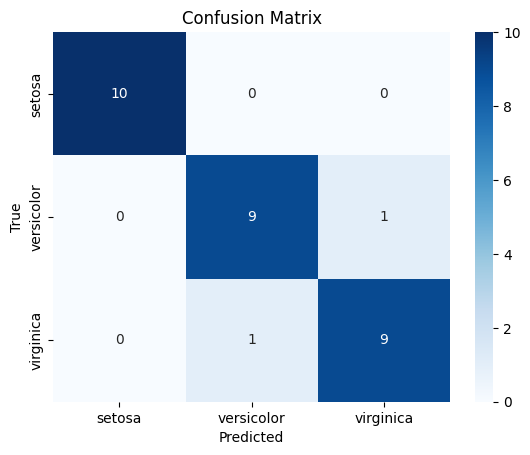

In [45]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Q6: Confusion Matrix를 보고 결과를 해석해보세요.
# setosa는 잘 맞추고, versicolor의 경우 하나의 샘플을 virginica로 잘못 분류하였다.